# COUGHVID Dataset - Exploratory Data Analysis

### Imports

In [2]:
# Data processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

# Audio files processing
import pyaudio
import wave
#import simpleaudio

# Manipualting File paths
from pathlib import Path
import os
import re
import glob

### Paths

In [3]:
# Path to folder containing the data (can be used in both Linux and Windows)
data_path = Path(Path.cwd(), "public_dataset")
print(f"Data folder: {data_path}")

metadata_summary_path = os.path.join(data_path, 'metadata_compiled.csv')
print(f"Data summary file: {metadata_summary_path}")

Data folder: C:\Users\antre\Documents\mlp2_project\public_dataset
Data summary file: C:\Users\antre\Documents\mlp2_project\public_dataset\metadata_compiled.csv


### Data Loading

In [4]:
metadata_summary = pd.read_csv(metadata_summary_path, delimiter = ',')

#metadata_summary.info() 
#metadata_summary.describe()

print("There are {} rows (observations) and {} columns in the metadata+summary DataFrame"\
      .format(metadata_summary.shape[0], metadata_summary.shape[1]))

cat_vars = ["gender", "status", "respiratory_condition", "fever_muscle_pain"]
num_vars = ["age", "cough_detected"]

There are 20072 rows (observations) and 40 columns in the metadata+summary DataFrame


### Data Exploration

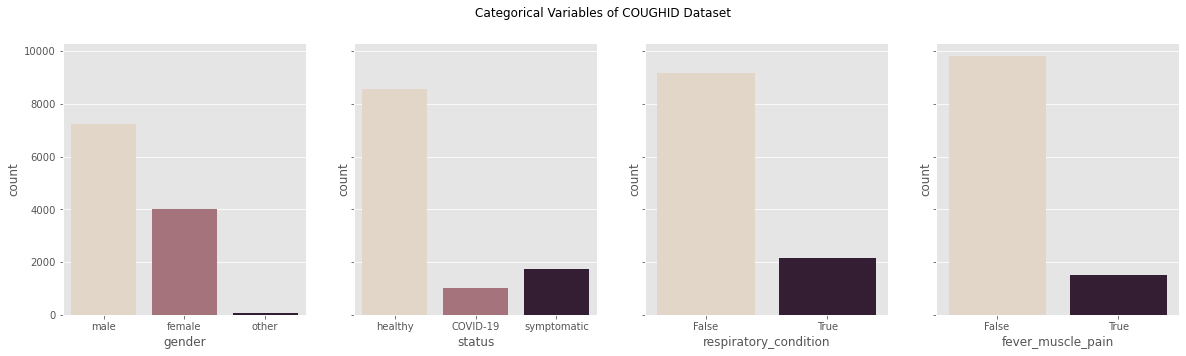

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Categorical Variables of COUGHID Dataset')

for i, var in enumerate(cat_vars):
    sns.countplot(ax=axes[i], x=var, palette="ch:.25", data=metadata_summary)

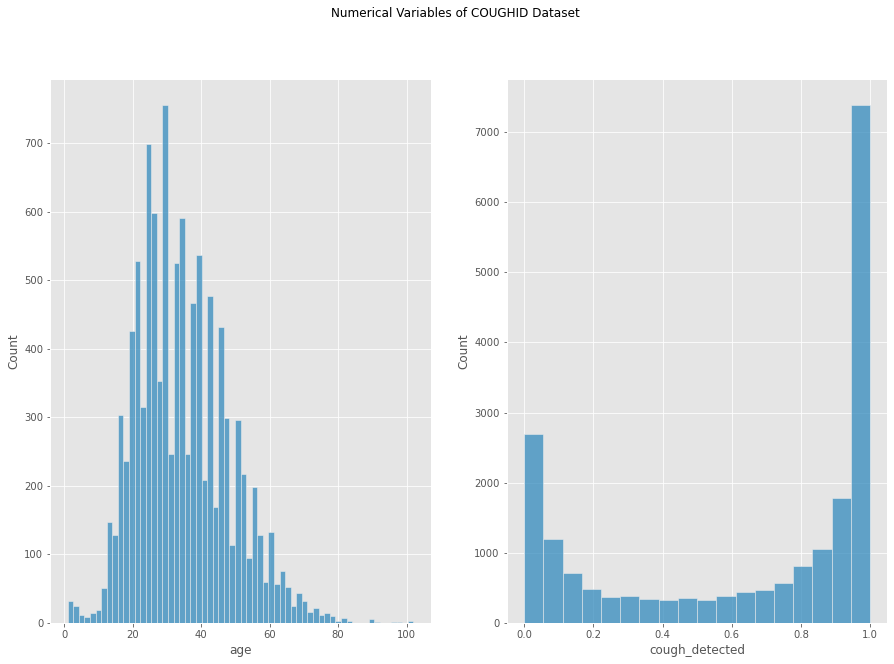

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Numerical Variables of COUGHID Dataset')

for i, var in enumerate(num_vars):
    sns.histplot(metadata_summary[var], ax=axes[i]);

### Analysis on self-annotated fields

In [112]:

col1 = []; col2 = []; col3 = []; col4 = []; col5 = [];
for i in [70,75,80,85,90,95][::-1]:
    temp1 = metadata_summary[metadata_summary.cough_detected > i/100]
    col1.append(temp1.shape[0])
    col2.append(f"{temp1.status.isnull().sum()} ({temp1.status.notnull().sum()})")
    temp2 = temp1[temp1.status.notnull()].status
    col3.append(sum(temp2 == "healthy"))
    col4.append(sum(temp2 == "COVID-19"))
    col5.append(sum(temp2 == "symptomatic"))

cough_detect_pd = pd.DataFrame(data = list(zip(col1, col2, col3, col4, col5)), \
                               index = ["70%","75%","80%","85%","90%","95%"][::-1], \
                               columns = ["# data points","status (not) null", "status == 'healthy'", \
                                          "status == 'COVID-19'", "status == 'symptomatic'"])
    
cough_detect_pd.index.name = "min cough_detect %"

cough_detect_pd

,# data points,status (not) null,status == 'healthy',status == 'COVID-19',status == 'symptomatic'
min cough_detect %,,,,,
95%,7054,2161 (4893),3801,349,743
90%,8863,2775 (6088),4698,441,949
85%,9963,3156 (6807),5245,504,1058
80%,10743,3435 (7308),5626,547,1135
75%,11366,3666 (7700),5915,586,1199
70%,11822,3854 (7968),6117,608,1243


### Analysis on expert-annotated fields

In [155]:
exp_1 = metadata_summary[metadata_summary.quality_1.notnull()][metadata_summary.quality_2.isnull()][metadata_summary.quality_3.isnull()]
exp_2 = metadata_summary[metadata_summary.quality_2.notnull()][metadata_summary.quality_1.isnull()][metadata_summary.quality_3.isnull()]
exp_3 = metadata_summary[metadata_summary.quality_3.notnull()][metadata_summary.quality_2.isnull()][metadata_summary.quality_1.isnull()]

exp_all = metadata_summary[metadata_summary.quality_1.notnull()][metadata_summary.quality_2.notnull()][metadata_summary.quality_3.notnull()]


c1 = [exp_1.shape[0], exp_2.shape[0], exp_3.shape[0], exp_all.shape[0]]

c2 = [sum(exp_1.quality_1 == "good"), sum(exp_2.quality_2 == "good"), sum(exp_3.quality_3 == "good"), f"{sum(exp_all.quality_1 == 'good')}/{sum(exp_all.quality_2 == 'good')}/{sum(exp_all.quality_3 == 'good')}"]
c3 = [sum(exp_1.quality_1 == "ok"), sum(exp_2.quality_2 == "ok"), sum(exp_3.quality_3 == "ok"), f'{sum(exp_all.quality_1 == "ok")}/{sum(exp_all.quality_2 == "ok")}/{sum(exp_all.quality_3 == "ok")}']
c4 = [sum(exp_1.quality_1 == "poor"), sum(exp_2.quality_2 == "poor"), sum(exp_3.quality_3 == "poor"), f'{sum(exp_all.quality_1 == "poor")}/{sum(exp_all.quality_2 == "poor")}/{sum(exp_all.quality_3 == "poor")}']
c5 = [sum(exp_1.quality_1 == "no_cough"), sum(exp_2.quality_2 == "no_cough"), sum(exp_3.quality_3 == "no_cough"), f'{sum(exp_all.quality_1 == "no_cough")}/{sum(exp_all.quality_2 == "no_cough")}/{sum(exp_all.quality_3 == "no_cough")}']

c6 = [sum(exp_1.diagnosis_1 == "COVID-19"), sum(exp_2.diagnosis_2 == "COVID-19"), sum(exp_3.diagnosis_3 == "COVID-19"), f"{sum(exp_all.diagnosis_1 == 'COVID-19')}/{sum(exp_all.diagnosis_2 == 'COVID-19')}/{sum(exp_all.diagnosis_3 == 'COVID-19')}"]
c7 = [sum(exp_1.diagnosis_1 == "healthy_cough"), sum(exp_2.diagnosis_2 == "healthy_cough"), sum(exp_3.diagnosis_3 == "healthy_cough"), f'{sum(exp_all.diagnosis_1 == "healthy_cough")}/{sum(exp_all.diagnosis_2 == "healthy_cough")}/{sum(exp_all.diagnosis_3 == "healthy_cough")}']
c8 = [sum(exp_1.diagnosis_1 == "lower_infection"), sum(exp_2.diagnosis_2 == "lower_infection"), sum(exp_3.diagnosis_3 == "lower_infection"), f'{sum(exp_all.diagnosis_1 == "lower_infection")}/{sum(exp_all.diagnosis_2 == "lower_infection")}/{sum(exp_all.diagnosis_3 == "lower_infection")}']
c9 = [sum(exp_1.diagnosis_1 == "obstructive_disease"), sum(exp_2.diagnosis_2 == "obstructive_disease"), sum(exp_3.diagnosis_3 == "obstructive_disease"), f'{sum(exp_all.diagnosis_1 == "obstructive_disease")}/{sum(exp_all.diagnosis_2 == "obstructive_disease")}/{sum(exp_all.diagnosis_3 == "obstructive_disease")}']
c10 = [sum(exp_1.diagnosis_1 == "upper_infection"), sum(exp_2.diagnosis_2 == "upper_infection"), sum(exp_3.diagnosis_3 == "upper_infection"), f'{sum(exp_all.diagnosis_1 == "upper_infection")}/{sum(exp_all.diagnosis_2 == "upper_infection")}/{sum(exp_all.diagnosis_3 == "upper_infection")}']



expert_annot_pd = pd.DataFrame(data = list(zip(c1, c2, c3, c4, c5, c6, c7, c8, c9, c10)), \
                  index =  ["By expert 1 only", "By expert 2 only", "By expert 3 only", "By all experts"], \
                  columns = ["# data points", \
                             "quality == 'good'", "quality == 'ok'", "quality == 'poor'", "quality == 'no_cough'", \
                            "diagnosis == 'COVID-19'", "diagnosis == 'healthy_cough'", "diagnosis == 'lower_infection'", "diagnosis == 'obstructive_disease'", "diagnosis == 'upper_infection'" \
                            ] \
                  )

expert_annot_pd

<ipython-input-155-072cfc687874>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_1 = metadata_summary[metadata_summary.quality_1.notnull()][metadata_summary.quality_2.isnull()][metadata_summary.quality_3.isnull()]
<ipython-input-155-072cfc687874>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_2 = metadata_summary[metadata_summary.quality_2.notnull()][metadata_summary.quality_1.isnull()][metadata_summary.quality_3.isnull()]
<ipython-input-155-072cfc687874>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_3 = metadata_summary[metadata_summary.quality_3.notnull()][metadata_summary.quality_2.isnull()][metadata_summary.quality_1.isnull()]
<ipython-input-155-072cfc687874>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_all = metadata_summary[metadata_summary.quality_1.notnull()][metadata_summary.quality_2.notnull()][metadata_summary.quality_3.not

,# data points,quality == 'good',quality == 'ok',quality == 'poor',quality == 'no_cough',diagnosis == 'COVID-19',diagnosis == 'healthy_cough',diagnosis == 'lower_infection',diagnosis == 'obstructive_disease',diagnosis == 'upper_infection'
By expert 1 only,690,29,517,127,17,234,222,203,10,21
By expert 2 only,690,356,238,79,17,233,63,153,90,151
By expert 3 only,690,630,25,12,23,1,171,168,30,296
By all experts,130,3/66/119,97/48/6,29/14/3,1/2/2,45/52/0,37/4/28,41/20/26,5/22/5,2/32/68


In [147]:
sum(exp_1.quality_1 == "good")

29